In [93]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [94]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [96]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 32
learning_rate = 0.0003 ## 0.0003
N_Epochs      = 1000

epsilon = 0.0001

In [97]:
path_data = '/content/drive/MyDrive/winequality-red.csv'

WINE_raw_data = pd.read_csv( path_data, delimiter="," )

In [98]:
WINE_raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [99]:
headers_list = WINE_raw_data.columns.values.tolist()

headers_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [100]:
headers_list2 = [ 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

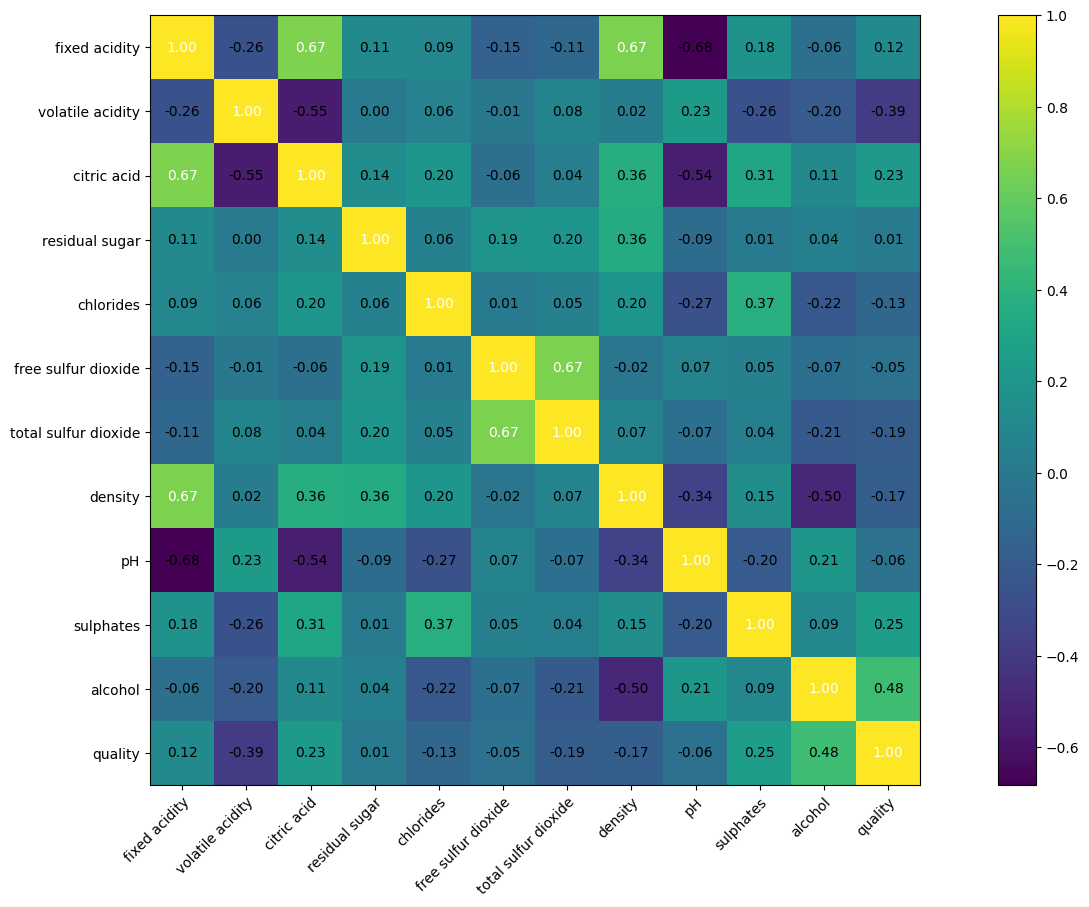

In [101]:
cm = np.corrcoef(   WINE_raw_data[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
plt.show()



In [102]:
WINE_raw_data_np = WINE_raw_data.to_numpy()

In [103]:
WINE_raw_data_np

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [104]:
WINE_raw_data_np.shape

(1599, 12)

In [105]:
X = WINE_raw_data_np[:, :-1]


y = WINE_raw_data_np[:, 11:12]

In [106]:
y

array([[5.],
       [5.],
       [5.],
       ...,
       [6.],
       [5.],
       [6.]])

In [107]:
y = y.astype(int)

In [108]:
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]])

In [109]:
the_set = np.unique(y)

the_set

array([3, 4, 5, 6, 7, 8])

In [110]:
len(  the_set  )

6

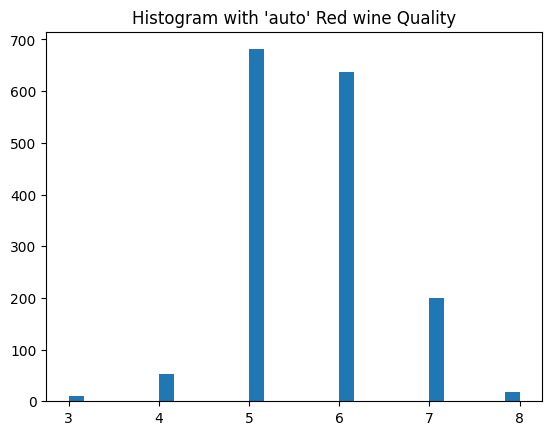

In [111]:
_ = plt.hist(y, bins='auto')

plt.title("Histogram with 'auto' Red wine Quality")

plt.show()

In [112]:
print(X.shape)

print(y.shape)

(1599, 11)
(1599, 1)


In [113]:
random_seed = int( random.random() * 100 )     ## 42

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279, 1)
(320, 1)


In [116]:
X_test.dtype

dtype('float64')

In [117]:

y_test.dtype

dtype('int64')

In [118]:
## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.int64 )       ## np.long
y_test  = y_test.astype(   np.int64 )

In [119]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [120]:
x_means      = X_train_tr.mean(0, keepdim=True )

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [121]:
x_means

tensor([[ 8.3513,  0.5274,  0.2747,  2.5441,  0.0880, 16.0731, 47.3065,  0.9968,
          3.3096,  0.6592, 10.4287]])

In [122]:
x_deviations

tensor([[1.7635e+00, 1.7971e-01, 1.9223e-01, 1.4084e+00, 4.9522e-02, 1.0694e+01,
         3.3663e+01, 2.0134e-03, 1.5759e-01, 1.7533e-01, 1.0778e+00]])

In [123]:
X_train.shape[0]

1279

In [124]:
## label_map = {0:0, 2:1 }
## the_set = array([ 3,   4,   5,   6,   7,   8,   9   ])

label_map         = { 3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6 }
reverse_label_map = { 0:3, 1:4, 2:5, 3:6, 4:7, 5:8, 6:9 }

In [125]:
wine_train_list = [  ( X_train_tr[i], label_map[ y_train_tr[i].item() ] )  for i in range( X_train.shape[0] ) ]

wine_test_list  = [  ( X_test_tr[i],  label_map[ y_test_tr[i].item()  ] )  for i in range( X_test.shape[0] ) ]

In [126]:
train_dl = torch.utils.data.DataLoader(wine_train_list, batch_size=batch_size, shuffle=True)

In [127]:
all_test_data = X_test.shape[0]

test_dl  = torch.utils.data.DataLoader(wine_test_list,  batch_size=all_test_data, shuffle=True)

In [128]:
train_dl

In [129]:
## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(11, 5)
        self.act1    = nn.ReLU()   ## nn.Sigmoid()
        self.linear2 = nn.Linear(5, 7)
        self.act2    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)


    ## perform inference
    def forward(self, x):

        ## x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        ## x      = self.dropout(x)
        x      = self.linear2(x)
        y_pred = self.act2(x)

        return y_pred


In [130]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):

    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(11, 15)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(15, 9)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(9, 7)
        self.act3    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        x      = self.dropout(x)
        x      = self.linear2(x)
        x      = self.act2(x)
        x      = self.dropout(x)
        x      = self.linear3(x)
        y_pred = self.act3(x)

        return y_pred

In [131]:
def training_loop( N_Epochs, model, loss_fn, opt  ):

    for epoch in range(N_Epochs):
        for xb, yb in train_dl:

            ## yb = torch.squeeze(yb, dim=1)

            y_pred = model(xb)
            ## print(    yb.shape   )
            ## print( y_pred.shape  )
            loss   = loss_fn(y_pred, yb)

            opt.zero_grad()
            loss.backward()
            opt.step()

        if epoch % 50 == 0:
            print(epoch, "loss=", loss)

In [132]:
model      = MLP_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(2.0410, grad_fn=<NllLossBackward0>)
50 loss= tensor(1.8105, grad_fn=<NllLossBackward0>)
100 loss= tensor(1.6969, grad_fn=<NllLossBackward0>)
150 loss= tensor(1.6461, grad_fn=<NllLossBackward0>)
200 loss= tensor(1.6151, grad_fn=<NllLossBackward0>)
250 loss= tensor(1.6664, grad_fn=<NllLossBackward0>)
300 loss= tensor(1.6596, grad_fn=<NllLossBackward0>)
350 loss= tensor(1.6027, grad_fn=<NllLossBackward0>)
400 loss= tensor(1.7353, grad_fn=<NllLossBackward0>)
450 loss= tensor(1.6861, grad_fn=<NllLossBackward0>)
500 loss= tensor(1.6303, grad_fn=<NllLossBackward0>)
550 loss= tensor(1.5196, grad_fn=<NllLossBackward0>)
600 loss= tensor(1.5869, grad_fn=<NllLossBackward0>)
650 loss= tensor(1.5924, grad_fn=<NllLossBackward0>)
700 loss= tensor(1.6084, grad_fn=<NllLossBackward0>)
750 loss= tensor(1.7028, grad_fn=<NllLossBackward0>)
800 loss= tensor(1.6881, grad_fn=<NllLossBackward0>)
850 loss= tensor(1.5797, grad_fn=<NllLossBackward0>)
900 loss= tensor(1.6094, grad_fn=<NllLossBackward

In [133]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [134]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.57
Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 99 32  0  0]
 [ 0  0 49 82  0  0]
 [ 0  0  3 44  0  0]
 [ 0  0  0  3  0  0]]
Precision: 0.465
Recall: 0.566
F1-measure: 0.510


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [135]:
model      = DL_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(1.9598, grad_fn=<NllLossBackward0>)
50 loss= tensor(1.6419, grad_fn=<NllLossBackward0>)
100 loss= tensor(1.6496, grad_fn=<NllLossBackward0>)
150 loss= tensor(1.6941, grad_fn=<NllLossBackward0>)
200 loss= tensor(1.5744, grad_fn=<NllLossBackward0>)
250 loss= tensor(1.7327, grad_fn=<NllLossBackward0>)
300 loss= tensor(1.5962, grad_fn=<NllLossBackward0>)
350 loss= tensor(1.3774, grad_fn=<NllLossBackward0>)
400 loss= tensor(1.4984, grad_fn=<NllLossBackward0>)
450 loss= tensor(1.4469, grad_fn=<NllLossBackward0>)
500 loss= tensor(1.6185, grad_fn=<NllLossBackward0>)
550 loss= tensor(1.5444, grad_fn=<NllLossBackward0>)
600 loss= tensor(1.6168, grad_fn=<NllLossBackward0>)
650 loss= tensor(1.6504, grad_fn=<NllLossBackward0>)
700 loss= tensor(1.5961, grad_fn=<NllLossBackward0>)
750 loss= tensor(1.6777, grad_fn=<NllLossBackward0>)
800 loss= tensor(1.4027, grad_fn=<NllLossBackward0>)
850 loss= tensor(1.4904, grad_fn=<NllLossBackward0>)
900 loss= tensor(1.6219, grad_fn=<NllLossBackward

In [136]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.59
Confusion Matrix:
[[  0   0   0   1   0   0]
 [  0   0   5   2   0   0]
 [  0   0 103  28   0   0]
 [  0   0  45  86   0   0]
 [  0   0   6  41   0   0]
 [  0   0   0   3   0   0]]
Precision: 0.484
Recall: 0.591
F1-measure: 0.532


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Regression


In [137]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [138]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination
from sklearn.metrics import r2_score

In [139]:
import xgboost as xgb

In [140]:
!pip install onnxmltools
!pip install onnxruntime

In [141]:
!pip install skl2onnx

In [142]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [143]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 16
learning_rate = 0.005 ## 0.001
N_Epochs      = 100

epsilon = 0.0001

In [144]:
path_data = '/content/drive/MyDrive/winequality-red.csv'

WINE_raw_data = pd.read_csv( path_data, sep=",")

In [145]:
WINE_raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [146]:
headers_list = WINE_raw_data.columns.values.tolist()

headers_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [147]:
headers_list2 = [ 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

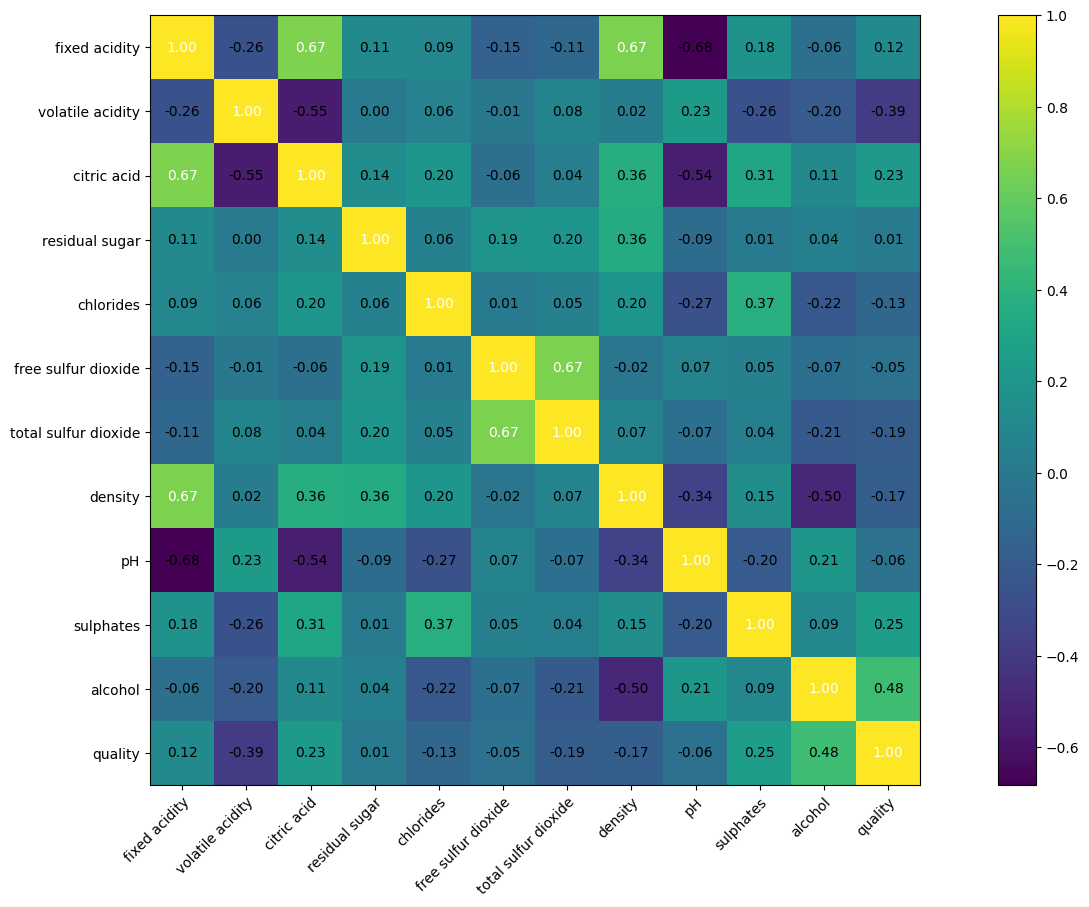

In [148]:
cm = np.corrcoef(   WINE_raw_data[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
plt.show()

In [149]:
## Convert Pandas to Numpy

WINE_raw_data_np = WINE_raw_data.to_numpy()

In [150]:
WINE_raw_data_np

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [151]:
WINE_raw_data_np.shape

(1599, 12)

In [152]:
X = WINE_raw_data_np[:, :-1]


y = WINE_raw_data_np[:, 11:12]

In [153]:
y

array([[5.],
       [5.],
       [5.],
       ...,
       [6.],
       [5.],
       [6.]])

In [154]:
print(X.shape)

print(y.shape)

(1599, 11)
(1599, 1)


In [155]:
random_seed = int( random.random() * 100 )     ## 42

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)
y_train = y_train.ravel() # Flatten y_train
y_test = y_test.ravel()   # Flatten y_test

In [157]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [158]:
y_test.dtype

dtype('float64')

In [159]:
## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.float32  )
y_test  = y_test.astype(   np.float32  )

In [160]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [161]:
x_means      = X_train_tr.mean(0, keepdim=True )

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [162]:
x_means

tensor([[ 8.3226,  0.5328,  0.2701,  2.5328,  0.0884, 15.8819, 46.7686,  0.9967,
          3.3089,  0.6629, 10.4272]])

In [163]:
x_deviations

tensor([[1.7472e+00, 1.7915e-01, 1.9621e-01, 1.3984e+00, 5.1017e-02, 1.0479e+01,
         3.3325e+01, 1.9875e-03, 1.5778e-01, 1.7741e-01, 1.0737e+00]])

In [164]:
train_ds = TensorDataset( X_train_tr, y_train_tr  )

In [165]:
train_dl = DataLoader( train_ds, batch_size, shuffle=True  )

In [166]:
train_dl

In [167]:
## Linear Regression

class LinRegNet(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(11, 1)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        y_pred = self.linear1(x)
        ## return torch.round( y_pred )
        return y_pred


In [168]:
## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(11, 8)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        y_pred = self.linear2(x)

        ## return torch.round( y_pred )
        return y_pred



In [169]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(11, 10)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(10, 6)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(6, 1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)

        ## return torch.round( y_pred )
        return y_pred

In [170]:
## Linear plus Nonlinear
## f1 + f2

class LinearPlusNonLinear_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        ## F1
        self.f1_linear1 = nn.Linear(11, 1)

        ## F2
        self.f2_linear1 = nn.Linear(11, 14)
        self.f2_act1    = nn.Sigmoid()
        self.f2_linear2 = nn.Linear(14, 1)


    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        ## F1
        f1 = self.f1_linear(x)

        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_linear2(f2)

        y_pred = f1 + f2

        ## return torch.round( y_pred )
        return y_pred

In [171]:
def training_loop( N_Epochs, model, loss_fn, opt  ):

    for epoch in range(N_Epochs):
        for xb, yb in train_dl:

            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb)

            opt.zero_grad()
            loss.backward()
            opt.step()

        if epoch % 20 == 0:
            print(epoch, "loss=", loss)


In [172]:
## model = LinRegNet( x_means, x_deviations  )
model = DL_Net( x_means, x_deviations  )

opt     = torch.optim.Adam(    model.parameters(), lr=learning_rate )
loss_fn = F.mse_loss

training_loop(  N_Epochs, model, loss_fn, opt  )

/tmp/ipython-input-3722981469.py:7: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss   = loss_fn(y_pred, yb)
/tmp/ipython-input-3722981469.py:7: UserWarning: Using a target size (torch.Size([15])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss   = loss_fn(y_pred, yb)


0 loss= tensor(2.0632, grad_fn=<MseLossBackward0>)
20 loss= tensor(0.6712, grad_fn=<MseLossBackward0>)
40 loss= tensor(0.5318, grad_fn=<MseLossBackward0>)
60 loss= tensor(0.6456, grad_fn=<MseLossBackward0>)
80 loss= tensor(0.4076, grad_fn=<MseLossBackward0>)


In [173]:
y_pred_test = model( X_test_tr )

In [174]:
y_pred_test.shape

torch.Size([320, 1])

In [175]:
print( "Testing R**2: ", r2_score(  y_test_tr.numpy(),  y_pred_test.detach().numpy()     )  )

Testing R**2:  0.04607212543487549


In [176]:
y_pred_test.shape

torch.Size([320, 1])

In [177]:
y_test_tr.shape

torch.Size([320])

In [178]:
len(X_test_tr)

320

In [181]:
list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
    print("************************************")
    print("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print(( np_pred  , np_real))
    list_preds.append(np_pred[0])
    list_reals.append(np_real)

************************************
pred, real
(array([5.486966], dtype=float32), array(6., dtype=float32))
************************************
pred, real
(array([5.402508], dtype=float32), array(6., dtype=float32))
************************************
pred, real
(array([5.596856], dtype=float32), array(6., dtype=float32))
************************************
pred, real
(array([5.366528], dtype=float32), array(5., dtype=float32))
************************************
pred, real
(array([5.482064], dtype=float32), array(5., dtype=float32))
************************************
pred, real
(array([5.5323668], dtype=float32), array(5., dtype=float32))
************************************
pred, real
(array([5.5066757], dtype=float32), array(5., dtype=float32))
************************************
pred, real
(array([5.6531153], dtype=float32), array(6., dtype=float32))
************************************
pred, real
(array([5.56474], dtype=float32), array(6., dtype=float32))
*****************

In [182]:
model.eval()

dummy_input = torch.randn(1, 11)

input_names  = ["input1"]
output_names = ["output1"]

torch.onnx.export(
        model,
        dummy_input,
        "DLnet_WineData.onnx",
        verbose=False,
        input_names = input_names,
        output_names = output_names

)

/tmp/ipython-input-1047114702.py:8: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(


In [183]:
regressor = xgb.XGBRegressor(
        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3,
        base_score=0.5 # Explicitly set base_score here
)

In [184]:
initial_types = [('input', FloatTensorType([None, X_train.shape[1]]))]
regressor.fit(X_train, y_train)
onnx_model = onnxmltools.convert_xgboost(regressor, initial_types=initial_types)
onnxmltools.utils.save_model(onnx_model, '/content/drive/MyDrive/winequality-red.onnx') # Corrected filename

In [185]:
y_pred = regressor.predict(X_test)

In [186]:
y_pred.shape

(320,)

In [187]:
y_pred

array([5.5389094, 5.007868 , 5.9522457, 5.1718526, 5.9111795, 5.963515 ,
       5.0650363, 5.945048 , 6.5487943, 6.457026 , 5.1587744, 5.5703087,
       6.4704413, 5.720422 , 6.3885374, 5.933399 , 6.709471 , 5.216052 ,
       5.39906  , 6.085132 , 4.72235  , 6.4893575, 6.100801 , 6.1952243,
       5.239799 , 5.1573663, 5.051047 , 5.823911 , 4.898356 , 5.5688295,
       5.249448 , 5.529216 , 6.585831 , 5.05363  , 4.8307304, 5.8087106,
       5.4878573, 7.009579 , 5.625086 , 5.7732205, 5.144773 , 5.573109 ,
       5.7000594, 6.39421  , 5.2900987, 4.8525963, 6.2366056, 5.1569533,
       4.4430046, 6.076347 , 5.448103 , 5.748086 , 5.106331 , 5.047274 ,
       5.4021945, 5.76423  , 5.752764 , 6.3885374, 6.3911033, 4.90529  ,
       4.560435 , 5.4021726, 4.778679 , 6.534351 , 5.506236 , 6.1205816,
       4.8041935, 5.476138 , 5.7621565, 5.016196 , 5.5155478, 6.121264 ,
       6.45612  , 4.9287987, 4.855111 , 5.4271193, 5.7809834, 5.61229  ,
       5.8466897, 5.389967 , 4.926868 , 6.269507 , 

In [188]:
!pip install -U onnxmltools skl2onnx
!pip install xgboost==1.6.2

In [189]:
initial_types = [(
          'float_input',
          FloatTensorType(  [None, 11 ]  )

)]

In [190]:
onnx_model = onnxmltools.convert_xgboost(regressor, initial_types=initial_types)

onnxmltools.utils.save_model(onnx_model, '/content/DLnet_WineData.onnx')

In [191]:
sess = rt.InferenceSession('/content/DLnet_WineData.onnx')

In [192]:
input_name = sess.get_inputs()[0].name

In [193]:
input_name

'float_input'

In [194]:
label_name = sess.get_outputs()[0].name

In [195]:
label_name

'variable'

In [196]:
pred_ort = sess.run(  [label_name], {input_name: X_test.astype(np.float32)}  )

In [197]:
pred_ort[0]

array([[5.538909 ],
       [5.007868 ],
       [5.9522457],
       [5.1718526],
       [5.9111795],
       [5.963515 ],
       [5.0650363],
       [5.9450474],
       [6.5487943],
       [6.457026 ],
       [5.158774 ],
       [5.5703087],
       [6.4704413],
       [5.720422 ],
       [6.3885374],
       [5.933399 ],
       [6.709471 ],
       [5.216052 ],
       [5.39906  ],
       [6.085132 ],
       [4.72235  ],
       [6.4893575],
       [6.100801 ],
       [6.1952243],
       [5.2397995],
       [5.157366 ],
       [5.051047 ],
       [5.8239107],
       [4.898356 ],
       [5.5688295],
       [5.249448 ],
       [5.529216 ],
       [6.5858316],
       [5.0536304],
       [4.83073  ],
       [5.80871  ],
       [5.487857 ],
       [7.009579 ],
       [5.6250854],
       [5.7732205],
       [5.1447725],
       [5.573109 ],
       [5.7000594],
       [6.3942103],
       [5.2900987],
       [4.8525963],
       [6.2366056],
       [5.156954 ],
       [4.4430046],
       [6.076347 ],


# Task
Remove `[0]` when appending `np_real` to `list_reals`.

## modify_cells

### Subtask:
Remove `[0]` when appending `np_real` to `list_reals`.


## Summary:

This summary cannot be generated as the solving process was not provided.
